In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
df=pd.read_csv('C:\\Users\\USER\\Desktop\\Siteki\\Airbnb.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600


In [28]:
dupe_mask=df['Date']
dupe_mask[:5]

0    2020-12-10
1    2020-12-11
2    2020-12-14
3    2020-12-15
4    2020-12-16
Name: Date, dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       365 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [30]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
df.drop(labels=[0,2,1])

,Date,Open,High,Low,Close,Adj Close,Volume
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
5,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
6,2020-12-18,150.449997,159.000000,150.300003,157.300003,157.300003,15954200
7,2020-12-21,155.309998,172.000000,145.110001,163.020004,163.020004,17788100
...,...,...,...,...,...,...,...
360,2022-05-17,119.970001,120.180000,114.510002,117.500000,117.500000,6962900
361,2022-05-18,116.110001,117.040001,107.620003,108.029999,108.029999,9718700
362,2022-05-19,108.180000,116.349998,107.449997,114.169998,114.169998,8926600
363,2022-05-20,115.459999,116.250000,108.500000,112.550003,112.550003,6958300


In [32]:
df.drop(labels='Date',axis=1)

,Open,High,Low,Close,Adj Close,Volume
0,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
...,...,...,...,...,...,...
360,119.970001,120.180000,114.510002,117.500000,117.500000,6962900
361,116.110001,117.040001,107.620003,108.029999,108.029999,9718700
362,108.180000,116.349998,107.449997,114.169998,114.169998,8926600
363,115.459999,116.250000,108.500000,112.550003,112.550003,6958300


In [33]:
df['Close'].head()

0    144.710007
1    139.250000
2    130.000000
3    124.800003
4    137.990005
Name: Close, dtype: float64

In [34]:
df['Close']=df['Close'].astype('object')
df['Close'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 365 entries, 0 to 364
Series name: Close
Non-Null Count  Dtype 
--------------  ----- 
365 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [35]:
#normalize heterogenous numerical data by using standard scaler
dataset=df.drop(labels='Date',axis=1)
dataset_norm=StandardScaler().fit_transform(dataset)

In [36]:
#Build Cluster Algorithm using K=4
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(dataset_norm)
clusters4


C:\Users\USER\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=30)

In [37]:
clusters4.labels_

array([2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 0,

In [38]:
# Assign clusters to the data set
dataset4=dataset.copy()
dataset4['clusters4id']=clusters4.labels_
dataset4

,Open,High,Low,Close,Adj Close,Volume,clusters4id
0,146.000000,165.000000,141.250000,144.710007,144.710007,70447500,2
1,146.550003,151.500000,135.100006,139.25,139.250000,26980800,2
2,135.000000,135.300003,125.160004,130.0,130.000000,16966100,2
3,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2
4,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2
...,...,...,...,...,...,...,...
360,119.970001,120.180000,114.510002,117.5,117.500000,6962900,2
361,116.110001,117.040001,107.620003,108.029999,108.029999,9718700,2
362,108.180000,116.349998,107.449997,114.169998,114.169998,8926600,2
363,115.459999,116.250000,108.500000,112.550003,112.550003,6958300,2


In [39]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[ 0.3809716 ,  0.3548459 ,  0.40354464,  0.38332613,  0.38332613,
        -0.33796769],
       [ 1.60752991,  1.65241993,  1.57566099,  1.60102407,  1.60102407,
        -0.00615057],
       [-1.77778978, -1.70941906, -1.87457954, -1.81607067, -1.81607067,
         1.66467246],
       [-0.71740601, -0.72069892, -0.71059253, -0.7103896 , -0.7103896 ,
         0.0528212 ]])

In [40]:
# Group data by Clusters (K=4)
dataset4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Open,High,Low,Close,Adj Close,Volume
,,mean,mean,mean,mean,mean,mean
0,0,170.991132,174.719368,167.083230,170.944653,170.944653,4.974551e+06
1,1,195.449268,201.520643,189.855018,195.337321,195.337321,6.851711e+06
2,2,127.944440,132.082160,122.824005,126.886801,126.886801,1.630391e+07
3,3,149.088979,152.504086,145.437857,149.035571,149.035571,7.185326e+06


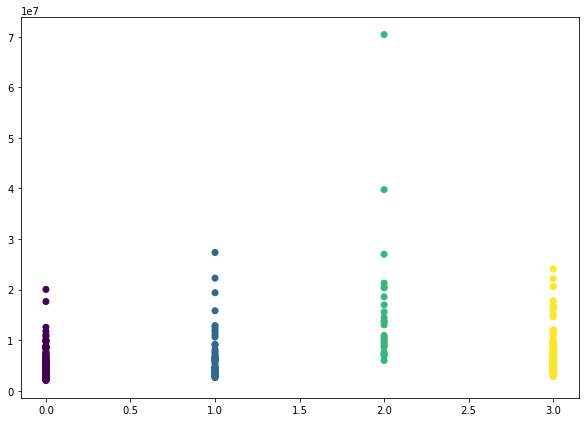

In [41]:
# Plot Clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.scatter(dataset4['clusters4id'],dataset4['Volume'], c=clusters4.labels_) 

In [42]:
#build Cluster Algorithm using K=5
#cluster algorithm using k=5
clusters5=KMeans(5,random_state=30).fit(dataset_norm)
clusters5

C:\Users\USER\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, random_state=30)

In [43]:
clusters5.labels_

array([3, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 0,

In [44]:
dataset5=dataset.copy()
dataset5['clusters5id']=clusters5.labels_
dataset5

,Open,High,Low,Close,Adj Close,Volume,clusters5id
0,146.000000,165.000000,141.250000,144.710007,144.710007,70447500,3
1,146.550003,151.500000,135.100006,139.25,139.250000,26980800,1
2,135.000000,135.300003,125.160004,130.0,130.000000,16966100,1
3,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,1
4,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,1
...,...,...,...,...,...,...,...
360,119.970001,120.180000,114.510002,117.5,117.500000,6962900,1
361,116.110001,117.040001,107.620003,108.029999,108.029999,9718700,1
362,108.180000,116.349998,107.449997,114.169998,114.169998,8926600,1
363,115.459999,116.250000,108.500000,112.550003,112.550003,6958300,1


In [45]:
# Compute the centroids for K=5 clusters with 11 variables

clusters5.cluster_centers_

array([[ 3.84724428e-01,  3.58566505e-01,  4.07411622e-01,
         3.87234134e-01,  3.87234134e-01, -3.38060457e-01],
       [-1.69653762e+00, -1.66659235e+00, -1.78062774e+00,
        -1.73830850e+00, -1.73830850e+00,  8.56672808e-01],
       [-6.78619923e-01, -6.81183257e-01, -6.68263716e-01,
        -6.66782590e-01, -6.66782590e-01,  3.82316387e-02],
       [-1.09407617e+00, -7.74395071e-01, -1.20917146e+00,
        -1.23109036e+00, -1.23109036e+00,  8.52270619e+00],
       [ 1.60752991e+00,  1.65241993e+00,  1.57566099e+00,
         1.60102407e+00,  1.60102407e+00, -6.15057131e-03]])

In [46]:
# Group data by Clusters (K=5)
dataset5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Open,High,Low,Close,Adj Close,Volume
,,mean,mean,mean,mean,mean,mean
0,0,171.065965,174.796217,167.158357,171.022938,171.022938,4.974027e+06
1,1,129.564645,132.966742,124.649294,128.444517,128.444517,1.173288e+07
2,2,149.862391,153.320278,146.260218,149.909097,149.909097,7.102790e+06
3,3,141.578003,151.394996,135.751503,138.605004,138.605004,5.510125e+07
4,4,195.449268,201.520643,189.855018,195.337321,195.337321,6.851711e+06


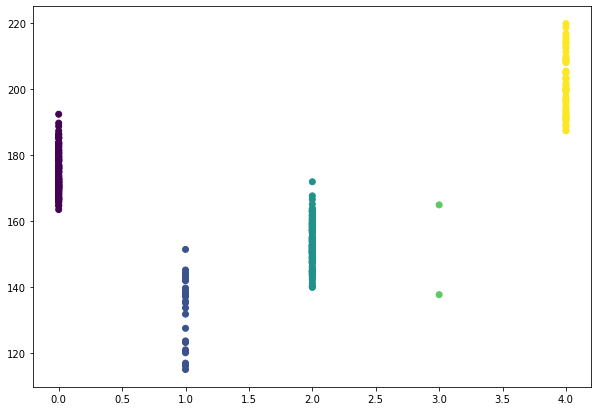

In [47]:
plt.figure(figsize=(10,7))
plt.scatter(dataset5['clusters5id'],dataset5['High'],c=clusters5.labels_)
